In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.colors
# Color for False and True
cmap = matplotlib.colors.ListedColormap(['k', 'w', ])

from sample_generation import generate_fnn, load_result

Instructions for updating:
non-resource variables are not supported in the long term


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/histograms.py:1124: RuntimeWarning: invalid value encountered in divide
  hist /= s


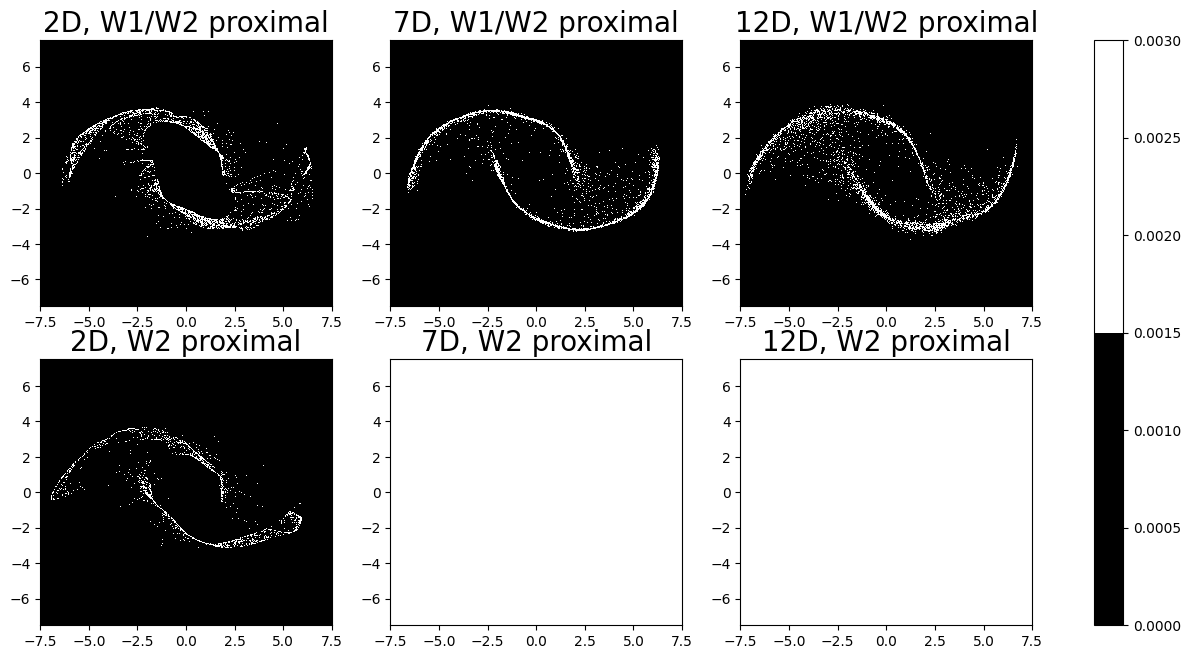

In [2]:
dataset = 'Moons'
scales = {'Mixture_of_8_gaussians': 2, 'Checkerboard': 1, 'Swissroll':5,\
          'Circles': 2, 'Moons': 7, 'Pinwheel': 2, 'Spirals2': 2}
scale = scales[dataset]
total_dims = [2, 7, 12]

result_path_w1w2 = f'assets/{dataset}/D1P2/Flow-GAN-'
result_path_w2 = f'assets/{dataset}/P2/Flow-GAN-'

c = 1
nBins = 500
fig, axes = plt.subplots(2, len(total_dims), figsize=(16*c, 3.8*2*c))
for i, total_dim in enumerate(total_dims):
    if total_dim == 2:
        path = result_path_w1w2 + 'Rep3'
    else:
        path = result_path_w1w2 + f'dim{total_dim}-Rep3'
    
    samples = generate_fnn(path, 20000, total_dim, bs=200)
    im = axes[0, i].hist2d(samples[:,0], samples[:,1], range=[[-scale-0.5, scale+0.5], [-scale-0.5, scale+0.5]], density=True, bins=nBins, vmin=-0.00, vmax=0.003, cmap=cmap)
    axes[0, i].set_title(f'{total_dim}D, W1/W2 proximal', fontsize = 20)
    
    
    if total_dim == 2:
        path = result_path_w2 + 'Rep3'
    else:
        path = result_path_w2 + f'dim{total_dim}-Rep3'
    
    samples = generate_fnn(path, 10000, total_dim, bs=200)
    im = axes[1, i].hist2d(samples[:,0], samples[:,1], range=[[-scale-0.5, scale+0.5], [-scale-0.5, scale+0.5]], density=True, bins=nBins, vmin=-0.00, vmax=0.003, cmap=cmap)
    axes[1, i].set_title(f'{total_dim}D, W2 proximal', fontsize = 20)
    
fig.colorbar(im[-1], ax=axes, location='right')
plt.show()  

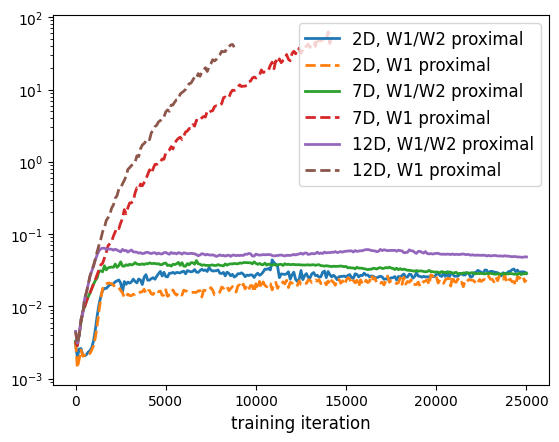

In [3]:
dataset = 'Moons'
scales = {'Mixture_of_8_gaussians': 2, 'Checkerboard': 1, 'Swissroll':5,\
          'Circles': 2, 'Moons': 7, 'Pinwheel': 2, 'Spirals2': 2}
iterations = {'Moons': 25000, 'Pinwheel': 25000}
scale = scales[dataset]
total_dims = [2, 7, 12]
iteration = iterations[dataset]

result_path_w1w2 = f'assets/{dataset}/D1P2/Flow-GAN-'
result_path_w2 = f'assets/{dataset}/P2/Flow-GAN-'

save_iter = 100
for i, total_dim in enumerate(total_dims):
    if total_dim == 2:
        path = result_path_w1w2 + 'Rep3'
    else:
        path = result_path_w1w2 + f'dim{total_dim}-Rep3'
    
    terminal_cost, kinetic_energy, opt_cond1, opt_cond2, terminal_cost_test = load_result(path, cnn=False, losses=True)
    
    total_x = np.arange(0, iteration+1, save_iter)
    opt_cond2.extend([np.nan]*(len(total_x)-len(opt_cond2)))
    mask = np.isfinite(np.array(opt_cond2))
    plt.semilogy(total_x[mask], np.array(opt_cond2)[mask], '-',linewidth=2, label=f'{total_dim}D, W1/W2 proximal')


    if total_dim == 2:
        path = result_path_w2 + 'Rep3'
    else:
        path = result_path_w2 + f'dim{total_dim}-Rep3'
    
    terminal_cost, kinetic_energy, opt_cond1, opt_cond2, terminal_cost_test = load_result(path, cnn=False, losses=True)
    
    total_x = np.arange(0, iteration+1, save_iter)
    opt_cond2.extend([np.nan]*(len(total_x)-len(opt_cond2)))
    mask = np.isfinite(np.array(opt_cond2))
    plt.semilogy(total_x[mask], np.array(opt_cond2)[mask], '--', linewidth=2, label=f'{total_dim}D, W1 proximal')

plt.xlabel('training iteration', fontsize=12)
plt.legend(fontsize=12)


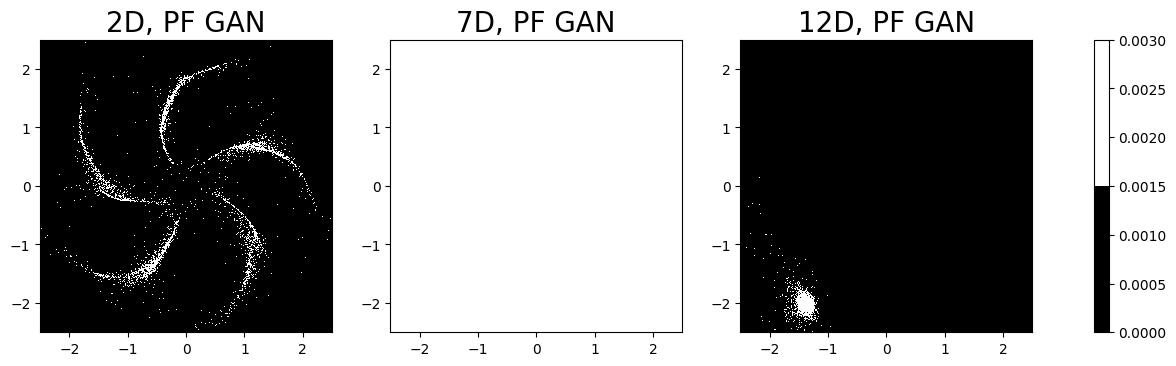

In [4]:
# Potential Flow Generator GAN
dataset = 'Pinwheel'
scales = {'Mixture_of_8_gaussians': 2, 'Checkerboard': 1, 'Swissroll':5,\
          'Circles': 2, 'Moons': 7, 'Pinwheel': 2, 'Spirals2': 2}
scale = scales[dataset]
total_dims = [2, 7, 12]

result_path = f'assets/{dataset}/PG/Flow-GAN-'

c = 1
nBins = 500
fig, axes = plt.subplots(1, len(total_dims), figsize=(16*c, 3.8*c))
for i, total_dim in enumerate(total_dims):
    if total_dim == 2:
        path = result_path + 'Rep3'
    else:
        path = result_path + f'dim{total_dim}-Rep3'
    
    samples = generate_fnn(path, 20000, total_dim, bs=200)
    im = axes[i].hist2d(samples[:,0], samples[:,1], range=[[-scale-0.5, scale+0.5], [-scale-0.5, scale+0.5]], density=True, bins=nBins, vmin=-0.00, vmax=0.003, cmap=cmap)
    axes[i].set_title(f'{total_dim}D, PF GAN', fontsize = 20)
    
    
    
fig.colorbar(im[-1], ax=axes, location='right')
plt.show()  

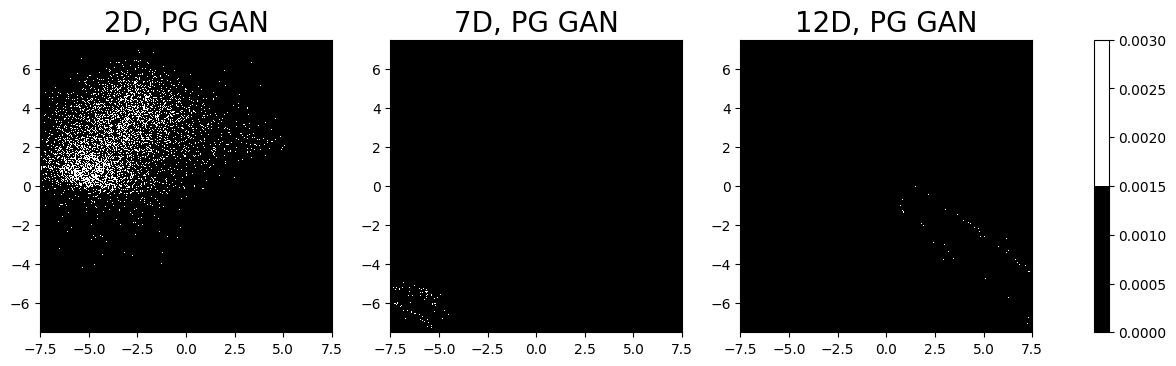

In [7]:
# Potential Flow Generator NF
dataset = 'Moons'
scales = {'Mixture_of_8_gaussians': 2, 'Checkerboard': 1, 'Swissroll':5,\
          'Circles': 2, 'Moons': 7, 'Pinwheel': 2, 'Spirals2': 2}
scale = scales[dataset]
total_dims = [2, 7, 12]

result_path = f'assets/{dataset}/PG/Flow-GAN-'

c = 1
nBins = 500
fig, axes = plt.subplots(1, len(total_dims), figsize=(16*c, 3.8*c))
for i, total_dim in enumerate(total_dims):
    if total_dim == 2:
        path = result_path + 'Rep3'
    else:
        path = result_path + f'dim{total_dim}-Rep3'
    
    samples = generate_fnn(path, 20000, total_dim, bs=200)
    im = axes[i].hist2d(samples[:,0], samples[:,1], range=[[-scale-0.5, scale+0.5], [-scale-0.5, scale+0.5]], density=True, bins=nBins, vmin=-0.00, vmax=0.003, cmap=cmap)
    axes[i].set_title(f'{total_dim}D, PG GAN', fontsize = 20)
    
    
    
fig.colorbar(im[-1], ax=axes, location='right')
plt.show()  

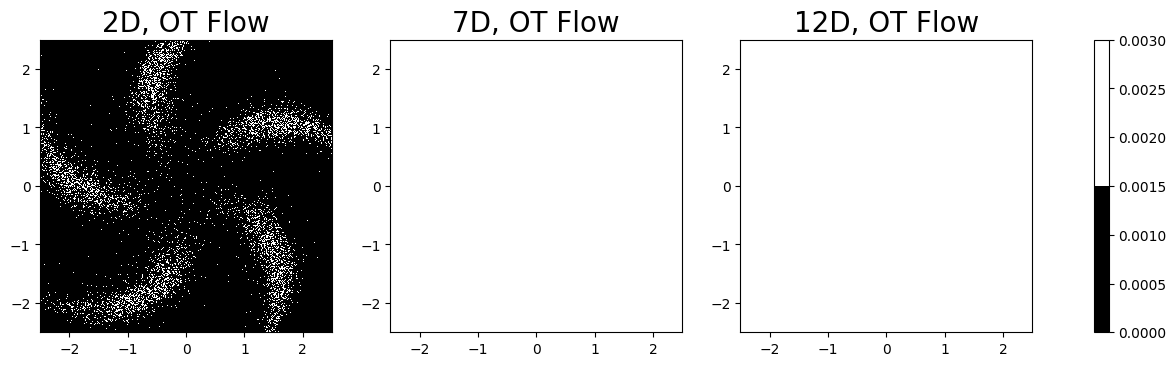

In [34]:
# OT Flow
dataset = 'Pinwheel'
scales = {'Mixture_of_8_gaussians': 2, 'Checkerboard': 1, 'Swissroll':5,\
          'Circles': 2, 'Moons': 7, 'Pinwheel': 2, 'Spirals2': 2}
scale = scales[dataset]
total_dims = [2, 7, 12]

result_path = f'assets/{dataset}/OT-Flow/otflow_'

c = 1
nBins = 500
fig, axes = plt.subplots(1, len(total_dims), figsize=(16*c, 3.8*c))
for i, total_dim in enumerate(total_dims):
    path = result_path + f'dim{total_dim}_5000samples.pickle'
    
    with open(path, "rb") as fr:    
        normal, samples =  pickle.load(fr)
    im = axes[i].hist2d(samples[:,0], samples[:,1], range=[[-scale-0.5, scale+0.5], [-scale-0.5, scale+0.5]], density=True, bins=nBins, vmin=-0.00, vmax=0.003, cmap=cmap)
    axes[i].set_title(f'{total_dim}D, OT Flow', fontsize = 20)
    
    
    
fig.colorbar(im[-1], ax=axes, location='right')
plt.show()  

In [8]:
# Wasserstein-2 distance
import torch # for W2 calculation purpose
try:
    from geomloss import SamplesLoss
except:
    !pip3 install geomloss
    from geomloss import SamplesLoss

def W2(X, Y):
    X = torch.from_numpy(X).type(torch.float32)
    Y = torch.from_numpy(Y).type(torch.float32)

    return SamplesLoss(loss='sinkhorn', p=2)(X, Y).numpy()

from data_generator import dataGenerator


Run the cells below twice. For an unknown reason, error pops up for the first run.

In [10]:
dataset = 'Pinwheel'
scales = {'Mixture_of_8_gaussians': 2, 'Checkerboard': 1, 'Swissroll':5,\
          'Circles': 2, 'Moons': 7, 'Pinwheel': 2, 'Spirals2': 2}
iterations = {'Moons': 25000, 'Pinwheel': 25000}
scale = scales[dataset]
total_dims = [2, 7, 12]
iteration = iterations[dataset]

result_path_w1w2 = f'assets/{dataset}/D1P2/Flow-GAN-'
result_path_w2 = f'assets/{dataset}/P2/Flow-GAN-'

save_iter = 100
misc_Q = {'submnfld_dim': 2, 'label':None, 'pretrained_ae':None, 'random_seed': 100}
Q = dataGenerator(5000, dataset, total_dim, misc_Q)
thisQ = Q.nextbatch(5000)
for i, total_dim in enumerate(total_dims):
    if total_dim == 2:
        path = result_path_w1w2 + 'Rep3'
    else:
        path = result_path_w1w2 + f'dim{total_dim}-Rep3'
    
    samples = generate_fnn(path, 5000, total_dim, bs=200)
    
    print(f"{total_dim}D W1/W2 proximal: {W2(samples[:,:2], thisQ)}")
    


    if total_dim == 2:
        path = result_path_w2 + 'Rep3'
    else:
        path = result_path_w2 + f'dim{total_dim}-Rep3'
    
    samples = generate_fnn(path, 5000, total_dim, bs=200)
    
    try:
        print(f"{total_dim}D W2 proximal: {W2(samples[:,:2], thisQ)}")
    except:
        pass



2D W1/W2 proximal: 0.007852695882320404
2D W2 proximal: 0.005358167923986912
7D W1/W2 proximal: 0.00986436940729618
12D W1/W2 proximal: 0.019267138093709946


In [20]:
dataset = 'Moons'
scales = {'Mixture_of_8_gaussians': 2, 'Checkerboard': 1, 'Swissroll':5,\
          'Circles': 2, 'Moons': 7, 'Pinwheel': 2, 'Spirals2': 2}
iterations = {'Moons': 25000, 'Pinwheel': 25000}
scale = scales[dataset]
total_dims = [2, 7, 12]
iteration = iterations[dataset]

result_path = f'assets/{dataset}/PG/Flow-GAN-'

save_iter = 100
misc_Q = {'submnfld_dim': 2, 'label':None, 'pretrained_ae':None, 'random_seed': 100}
Q = dataGenerator(5000, dataset, total_dim, misc_Q)
thisQ = Q.nextbatch(5000)
for i, total_dim in enumerate(total_dims):
    if total_dim == 2:
        path = result_path + 'Rep3'
    else:
        path = result_path + f'dim{total_dim}-Rep3'
    
    samples = generate_fnn(path, 5000, total_dim, bs=200)
    
    print(f"{total_dim}D W1/W2 proximal: {W2(samples[:,:2], thisQ)}")
    
    if total_dim == 2:
            path = result_path_w2 + 'Rep3'
    else:
        path = result_path_w2 + f'dim{total_dim}-Rep3'
    
    samples = generate_fnn(path, 5000, total_dim, bs=200)
    
    try:
        print(f"{total_dim}D W2 proximal: {W2(samples[:,:2], thisQ)}")
    except:
        pass


2D W1/W2 proximal: 10.115690231323242
2D W2 proximal: 4.240379333496094
7D W1/W2 proximal: 221.65057373046875
12D W1/W2 proximal: 2229.814453125


In [18]:
# OT Flow
print("OT Flow")
dataset = 'Moons'
scales = {'Mixture_of_8_gaussians': 2, 'Checkerboard': 1, 'Swissroll':5,\
          'Circles': 2, 'Moons': 7, 'Pinwheel': 2, 'Spirals2': 2}
scale = scales[dataset]
total_dims = [2, 7, 12]

result_path = f'assets/{dataset}/OT-Flow/otflow_'

misc_Q = {'submnfld_dim': 2, 'label':None, 'pretrained_ae':None, 'random_seed': 100}
Q = dataGenerator(5000, dataset, total_dim, misc_Q)
thisQ = Q.nextbatch(5000)
for i, total_dim in enumerate(total_dims):
    path = result_path + f'dim{total_dim}_5000samples.pickle'
    
    with open(path, "rb") as fr:    
        normal, samples =  pickle.load(fr)
    
    #print(samples[:5000,:2].shape)
    w2_dist = W2(samples[:5000,:2], thisQ)
    try:
        print(f"{total_dim}D W2 proximal: {w2_dist}")
    except:
        pass


2D W2 proximal: 2.515352249145508
7D W2 proximal: 3414138.25
12D W2 proximal: 167218646089728.0


In [26]:
# OT Flow
print("Potential-flow generator")

dataset = 'Moons'
scales = {'Mixture_of_8_gaussians': 2, 'Checkerboard': 1, 'Swissroll':5,\
          'Circles': 2, 'Moons': 7, 'Pinwheel': 2, 'Spirals2': 2}
scale = scales[dataset]
total_dims = [2, 7, 12]

result_path = f'assets/{dataset}/PG/Flow-GAN-'

misc_Q = {'submnfld_dim': 2, 'label':None, 'pretrained_ae':None, 'random_seed': 100}
Q = dataGenerator(5000, dataset, total_dim, misc_Q)
thisQ = Q.nextbatch(5000)
for i, total_dim in enumerate(total_dims):
    if total_dim == 2:
        path = result_path + 'Rep3'
    else:
        path = result_path + f'dim{total_dim}-Rep3'
    
    samples = generate_fnn(path, 5000, total_dim, bs=200)

    
    #print(samples[:5000,:2].shape)
    w2_dist = W2(samples[:5000,:2], thisQ)
    try:
        print(f"{total_dim}D W2 proximal: {w2_dist}")
    except:
        pass


Potential-flow generator
2D W2 proximal: 10.115690231323242
7D W2 proximal: 221.65057373046875
12D W2 proximal: 2229.814453125
